# Shardul Dabhane

# Problem 3: Changes in Kaggle Code for KNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#in Kaggle, File -> Add or upload data -> search for credit card
#note about the folder: ../input/creditcard
#change the folder if you have data in a different folder
data = pd.read_csv("creditcard.csv")
print(data.shape)
#data.head()
data.describe()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [2]:
#check if there are missing data
data.isnull().any().any()

#change 'Class' dtype to "bool"
data['Class'] = data['Class'].astype('bool')

In [3]:
class_zero = data.Class.value_counts().values[0]
class_one = data.Class.value_counts().values[1]
print(data["Class"].value_counts())

False    284315
True        492
Name: Class, dtype: int64


Text(0.5, 1.0, 'Class distribution')

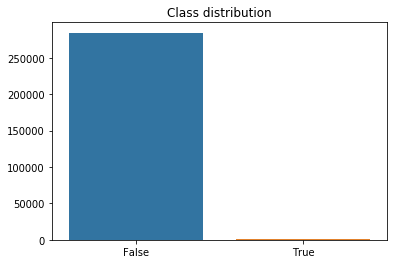

In [4]:
sb.barplot(x=data.Class.value_counts().index.values, y=data.Class.value_counts().values)
plt.title("Class distribution")

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
data['AmountNormalized'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data['AmountNormalized'].describe()

count    2.848070e+05
mean     3.202236e-16
std      1.000002e+00
min     -3.532294e-01
25%     -3.308401e-01
50%     -2.652715e-01
75%     -4.471707e-02
max      1.023622e+02
Name: AmountNormalized, dtype: float64

In [6]:
X = data.iloc[:, data.columns != 'Class'].values
y = data.iloc[:, data.columns == 'Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [7]:
def plot_precision_recall_curve(y_actual, y_score, model_name):
    precision, recall, _ = metrics.precision_recall_curve(y_actual, y_score)
    curve_data = pd.DataFrame(columns = range(0, len(precision)))
    curve_data.loc['Precision'] = precision
    curve_data.loc['Recall'] = recall
    #print (curve_data)
    plt.step(recall, precision, color='b', alpha=0.1, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.1, color='b')
    plt.title('Precision Recall Curve for {} Model'.format(model_name))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0, 1.05])
    plt.ylim([0, 1.0])

def evaluate_model(y_actual, y_pred, y_score, model_name):
    cm = metrics.confusion_matrix(y_actual, y_pred)
    print ('Confusion Matrix for {} Model'.format(model_name))
    print (cm)
    print ('Classification Report for {} Model'.format(model_name))
    print (metrics.classification_report(y_actual, y_pred, digits=6))
    print ('Area under under ROC curve for {} Model'.format(model_name))
    print (metrics.roc_auc_score(y_actual, y_score))
    plot_precision_recall_curve(y_actual, y_score, model_name)

Confusion Matrix for KNN (n=5) Model
[[56861     0]
 [   96     5]]
Classification Report for KNN (n=5) Model
              precision    recall  f1-score   support

       False   0.998315  1.000000  0.999157     56861
        True   1.000000  0.049505  0.094340       101

    accuracy                       0.998315     56962
   macro avg   0.999157  0.524752  0.546748     56962
weighted avg   0.998318  0.998315  0.997552     56962

Area under under ROC curve for KNN (n=5) Model
0.5777933195088735


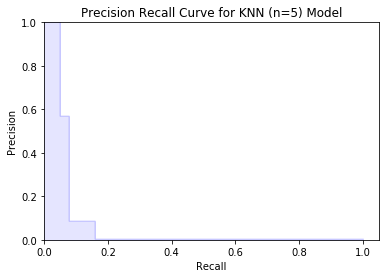

In [8]:
#KNN with minkowski metric, k=5 and p=2
from sklearn.neighbors import KNeighborsClassifier
#train
knn = KNeighborsClassifier(n_neighbors=5, metric= 'minkowski', p=2)
knn.fit(X_train, y_train.ravel())
#test
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)

evaluate_model(y_test, y_pred_knn, y_prob_knn[:, [1]], 'KNN (n=5)')

Confusion Matrix for KNN (n=10) Model
[[56861     0]
 [  100     1]]
Classification Report for KNN (n=10) Model
              precision    recall  f1-score   support

       False   0.998244  1.000000  0.999121     56861
        True   1.000000  0.009901  0.019608       101

    accuracy                       0.998244     56962
   macro avg   0.999122  0.504950  0.509365     56962
weighted avg   0.998248  0.998244  0.997385     56962

Area under under ROC curve for KNN (n=10) Model
0.580813016142718


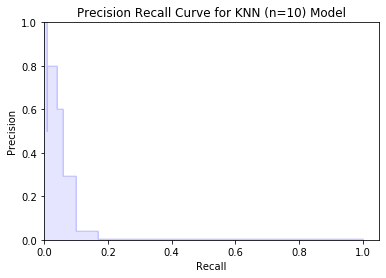

In [9]:
#KNN with minkowski metric, k=10 and p=2

from sklearn.neighbors import KNeighborsClassifier
#train
knn = KNeighborsClassifier(n_neighbors=10, metric= 'minkowski', p=2)
knn.fit(X_train, y_train.ravel())
#test
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)

evaluate_model(y_test, y_pred_knn, y_prob_knn[:, [1]], 'KNN (n=10)')

Confusion Matrix for KNN (n=50) Model
[[56861     0]
 [  101     0]]
Classification Report for KNN (n=50) Model
              precision    recall  f1-score   support

       False   0.998227  1.000000  0.999113     56861
        True   0.000000  0.000000  0.000000       101

    accuracy                       0.998227     56962
   macro avg   0.499113  0.500000  0.499556     56962
weighted avg   0.996457  0.998227  0.997341     56962

Area under under ROC curve for KNN (n=50) Model
0.6450030741981359

C:\Users\Shardul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


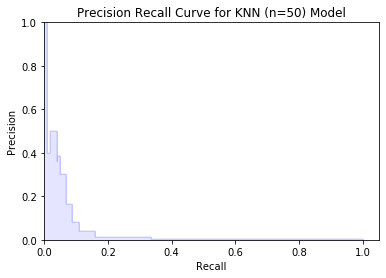

In [10]:
#KNN with minkowski metric, k=50 and p=2

from sklearn.neighbors import KNeighborsClassifier
#train
knn = KNeighborsClassifier(n_neighbors=50, metric= 'minkowski', p=2)
knn.fit(X_train, y_train.ravel())
#test
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)

evaluate_model(y_test, y_pred_knn, y_prob_knn[:, [1]], 'KNN (n=50)')

Confusion Matrix for KNN (n=100) Model
[[56861     0]
 [  101     0]]
Classification Report for KNN (n=100) Model
              precision    recall  f1-score   support

       False   0.998227  1.000000  0.999113     56861
        True   0.000000  0.000000  0.000000       101

    accuracy                       0.998227     56962
   macro avg   0.499113  0.500000  0.499556     56962
weighted avg   0.996457  0.998227  0.997341     56962

Area under under ROC curve for KNN (n=100) Model
0.6531097808256054


C:\Users\Shardul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


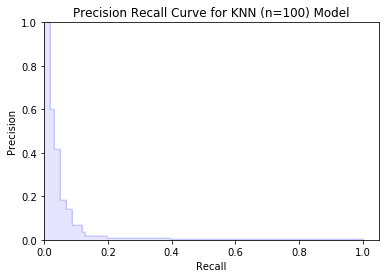

In [11]:
#KNN with minkowski metric, k=100 and p=2
from sklearn.neighbors import KNeighborsClassifier
#train
knn = KNeighborsClassifier(n_neighbors=100, metric= 'minkowski', p=2)
knn.fit(X_train, y_train.ravel())
#test
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)

evaluate_model(y_test, y_pred_knn, y_prob_knn[:, [1]], 'KNN (n=100)')

Confusion Matrix for KNN (n=5) Model
[[56861     0]
 [   96     5]]
Classification Report for KNN (n=5) Model
              precision    recall  f1-score   support

       False   0.998315  1.000000  0.999157     56861
        True   1.000000  0.049505  0.094340       101

    accuracy                       0.998315     56962
   macro avg   0.999157  0.524752  0.546748     56962
weighted avg   0.998318  0.998315  0.997552     56962

Area under under ROC curve for KNN (n=5) Model
0.5777933195088735


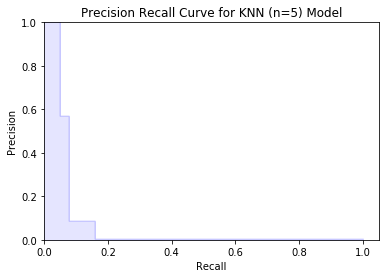

In [12]:
# KNN with k=5 and metric='euclidean'
from sklearn.neighbors import KNeighborsClassifier
#train
knn = KNeighborsClassifier(n_neighbors=5, metric= 'euclidean')
knn.fit(X_train, y_train.ravel())
#test
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)

evaluate_model(y_test, y_pred_knn, y_prob_knn[:, [1]], 'KNN (n=5)')

Confusion Matrix for KNN (n=10) Model
[[56861     0]
 [  100     1]]
Classification Report for KNN (n=10) Model
              precision    recall  f1-score   support

       False   0.998244  1.000000  0.999121     56861
        True   1.000000  0.009901  0.019608       101

    accuracy                       0.998244     56962
   macro avg   0.999122  0.504950  0.509365     56962
weighted avg   0.998248  0.998244  0.997385     56962

Area under under ROC curve for KNN (n=10) Model
0.580813016142718


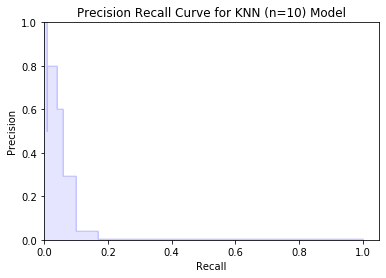

In [13]:
# KNN with k=10 and metric='euclidean'
from sklearn.neighbors import KNeighborsClassifier
#train
knn = KNeighborsClassifier(n_neighbors=10, metric= 'euclidean')
knn.fit(X_train, y_train.ravel())
#test
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)

evaluate_model(y_test, y_pred_knn, y_prob_knn[:, [1]], 'KNN (n=10)')

Confusion Matrix for KNN (n=50) Model
[[56861     0]
 [  101     0]]
Classification Report for KNN (n=50) Model
              precision    recall  f1-score   support

       False   0.998227  1.000000  0.999113     56861
        True   0.000000  0.000000  0.000000       101

    accuracy                       0.998227     56962
   macro avg   0.499113  0.500000  0.499556     56962
weighted avg   0.996457  0.998227  0.997341     56962

Area under under ROC curve for KNN (n=50) Model
0.6450030741981359


C:\Users\Shardul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


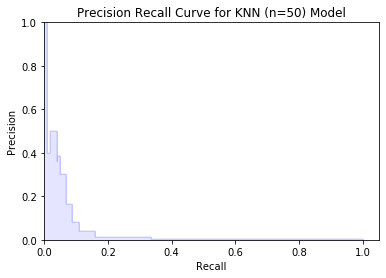

In [14]:
# KNN with k=50 and metric='euclidean'
from sklearn.neighbors import KNeighborsClassifier
#train
knn = KNeighborsClassifier(n_neighbors=50, metric= 'euclidean')
knn.fit(X_train, y_train.ravel())
#test
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)

evaluate_model(y_test, y_pred_knn, y_prob_knn[:, [1]], 'KNN (n=50)')

Confusion Matrix for KNN (n=100) Model
[[56861     0]
 [  101     0]]
Classification Report for KNN (n=100) Model
              precision    recall  f1-score   support

       False   0.998227  1.000000  0.999113     56861
        True   0.000000  0.000000  0.000000       101

    accuracy                       0.998227     56962
   macro avg   0.499113  0.500000  0.499556     56962
weighted avg   0.996457  0.998227  0.997341     56962

Area under under ROC curve for KNN (n=100) Model
0.6531097808256054


C:\Users\Shardul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


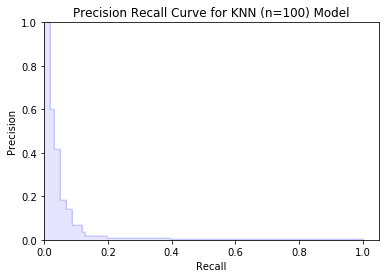

In [15]:
# KNN with k=100 and metric='euclidean'
from sklearn.neighbors import KNeighborsClassifier
#train
knn = KNeighborsClassifier(n_neighbors=100, metric= 'euclidean')
knn.fit(X_train, y_train.ravel())
#test
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)

evaluate_model(y_test, y_pred_knn, y_prob_knn[:, [1]], 'KNN (n=100)')

Confusion Matrix for KNN (n=5) Model
[[56861     0]
 [   90    11]]
Classification Report for KNN (n=5) Model
              precision    recall  f1-score   support

       False   0.998420  1.000000  0.999209     56861
        True   1.000000  0.108911  0.196429       101

    accuracy                       0.998420     56962
   macro avg   0.999210  0.554455  0.597819     56962
weighted avg   0.998422  0.998420  0.997786     56962

Area under under ROC curve for KNN (n=5) Model
0.6379445202570591


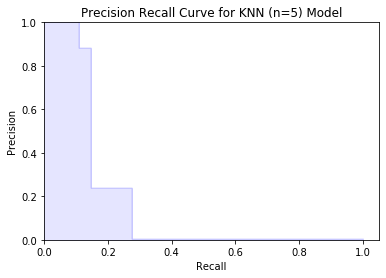

In [16]:
# KNN with k=5 and metric='manhattan'
from sklearn.neighbors import KNeighborsClassifier
#train
knn = KNeighborsClassifier(n_neighbors=5, metric= 'manhattan')
knn.fit(X_train, y_train.ravel())
#test
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)

evaluate_model(y_test, y_pred_knn, y_prob_knn[:, [1]], 'KNN (n=5)')

Confusion Matrix for KNN (n=10) Model
[[56861     0]
 [   93     8]]
Classification Report for KNN (n=10) Model
              precision    recall  f1-score   support

       False   0.998367  1.000000  0.999183     56861
        True   1.000000  0.079208  0.146789       101

    accuracy                       0.998367     56962
   macro avg   0.999184  0.539604  0.572986     56962
weighted avg   0.998370  0.998367  0.997671     56962

Area under under ROC curve for KNN (n=10) Model
0.6470332116133124


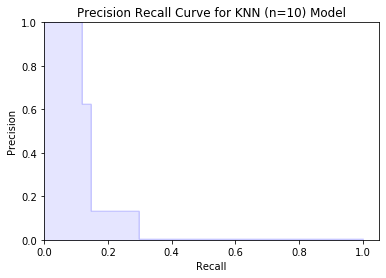

In [17]:
# KNN with k=10 and metric='manhattan'
from sklearn.neighbors import KNeighborsClassifier
#train
knn = KNeighborsClassifier(n_neighbors=10, metric= 'manhattan')
knn.fit(X_train, y_train.ravel())
#test
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)

evaluate_model(y_test, y_pred_knn, y_prob_knn[:, [1]], 'KNN (n=10)')

Confusion Matrix for KNN (n=50) Model
[[56861     0]
 [  101     0]]
Classification Report for KNN (n=50) Model
              precision    recall  f1-score   support

       False   0.998227  1.000000  0.999113     56861
        True   0.000000  0.000000  0.000000       101

    accuracy                       0.998227     56962
   macro avg   0.499113  0.500000  0.499556     56962
weighted avg   0.996457  0.998227  0.997341     56962

Area under under ROC curve for KNN (n=50) Model
0.6924904243647136


C:\Users\Shardul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


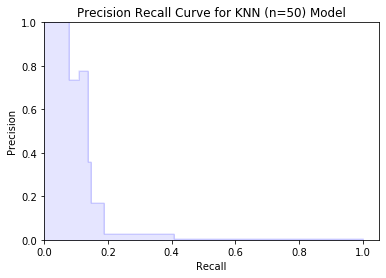

In [18]:
# KNN with k=50 and metric='manhattan'
from sklearn.neighbors import KNeighborsClassifier
#train
knn = KNeighborsClassifier(n_neighbors=50, metric= 'manhattan')
knn.fit(X_train, y_train.ravel())
#test
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)

evaluate_model(y_test, y_pred_knn, y_prob_knn[:, [1]], 'KNN (n=50)')

Confusion Matrix for KNN (n=100) Model
[[56861     0]
 [  101     0]]
Classification Report for KNN (n=100) Model


C:\Users\Shardul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       False   0.998227  1.000000  0.999113     56861
        True   0.000000  0.000000  0.000000       101

    accuracy                       0.998227     56962
   macro avg   0.499113  0.500000  0.499556     56962
weighted avg   0.996457  0.998227  0.997341     56962

Area under under ROC curve for KNN (n=100) Model
0.7287805889679557


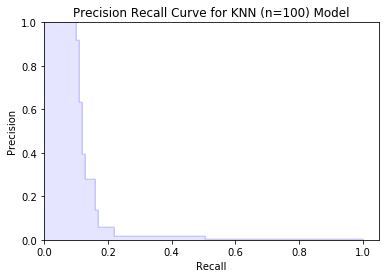

In [19]:
# KNN with k=100 and metric='manhattan'
from sklearn.neighbors import KNeighborsClassifier
#train
knn = KNeighborsClassifier(n_neighbors=100, metric= 'manhattan')
knn.fit(X_train, y_train.ravel())
#test
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)

evaluate_model(y_test, y_pred_knn, y_prob_knn[:, [1]], 'KNN (n=100)')

# Question 4: Link Analysis and PageRank algorithm implementation

In [20]:
#Pagerank implementation. 

#use numpy module
import numpy as np

# Define the function for page rank algorithm
def page_rank(transition_matrix):
    
    # Define the initial rank matrix
    rank_matrix = np.ones(6)/6
    
    # Get the dot product of the given matrix with rank
    dot_product = transition_matrix.dot(rank_matrix)
    
    # Repeat loop until ranks converge
    while True:
        dot_product = transition_matrix.dot(rank_matrix)
        if np.linalg.norm(np.abs(rank_matrix - dot_product)) < 0.01:
            break
        rank_matrix = dot_product
        
    return dot_product

In [21]:
# Given transition matrix as per the problem
transition_matrix = np.array([[ 0,  0.25,  0,  0,  0,  0.5],
       [ 0.5,  0,  0,  0,  0,  0],
       [ 0,  0.25,  0,  0,  0.5,  0.5],
       [ 0,  0.25,  1.0,  0,  0,  0],
       [ 0.5,  0,  0,  0.5,  0,  0],
       [ 0,  0.25,  0,  0.5,  0.5,  0]])
ranks_of_pages = page_rank(transition_matrix)
ranks_of_pages

array([0.12304687, 0.06119792, 0.20898438, 0.22591146, 0.17057292,
       0.21028646])

**Page ranks of web pages here after implementing the pagerank algorithm**:

**1. D(0.22591146)**

**2. F(0.21028646)**

**3. C(0.20898438)**

**4. E(0.17057292)**

**5. A(0.12304687)**

**6. B(0.06119792)**

In [22]:
# Defining the function for page rank algorithm with different distribution

def page_rank_scaled(transition_matrix):
    # Scaled rank matrix initial distribution
    rank_matrix = 100 * np.ones(6)/6
    
    # Get the dot product of the given matrix with rank
    dot_product = transition_matrix.dot(rank_matrix)
    
    # Repeat loop until ranks converge
    while True:
        dot_product = transition_matrix.dot(rank_matrix)
        
        if np.linalg.norm(np.abs(rank_matrix - dot_product)) < 0.001:
            break
        rank_matrix = dot_product
    return dot_product

In [23]:
ranks_of_pages = page_rank_scaled(transition_matrix)
ranks_of_pages

array([12.18261859,  6.0914689 , 20.81192096, 22.33527407, 17.25902329,
       21.31969419])

In [25]:
# Defining the function for page rank algorithm with different distribution

def page_rank_scaled_1(transition_matrix):
    # Scaled rank matrix initial distribution
    rank_matrix = 50 * np.ones(6)/6
    
    # Get the dot product of the given matrix with rank
    dot_product = transition_matrix.dot(rank_matrix)
    
    # Repeat loop until ranks converge
    while True:
        dot_product = transition_matrix.dot(rank_matrix)
        
        if np.linalg.norm(np.abs(rank_matrix - dot_product)) < 0.001:
            break
        rank_matrix = dot_product
    return dot_product

ranks_of_pages = page_rank_scaled_1(transition_matrix)
ranks_of_pages

array([ 6.09123373,  3.04578759, 10.40580814, 11.16776397,  8.62960096,
       10.65980561])

**Conclusion : The rank values for each page get scaled with scaling of
rank matrix and changing the initial distribution but the overall ranks remain same with D having highest
rank and F, C, E, A, B in the decreasing order.**

References:

[1] Introduction to Data Mining 2nd Edition By Tan, Steinbach, Kumar,Karpatne

[2] https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html

[3] https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

[4] https://notebook.community/hktxt/MachineLearning/PageRank

[5] https://developpaper.com/numerical-analysis-power-iteration-and-pagerank-algorithm/